In [30]:
import os,glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import Callback,EarlyStopping
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.applications.resnet50 import preprocess_input
from sklearn.metrics import classification_report

In [6]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl (11.5 MB)
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\ml_proj\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [8]:
pip install scikit-learn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.0 MB 1.3 MB/s eta 0:00:09
   - -------------------------------------- 0.4/11.0 MB 6.7 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/11.0 MB 8.4 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/11.0 MB 9.0 MB/s eta 0:00:02
   ------ --------------------------------- 1.9/11.0 MB 9.4 MB/s eta 0:00:01
   -------- ------------------------------- 2.4/11.0 MB 9.5 MB/s eta 0:00:01
   ---------- ----------------------------- 2.8/11.0 MB 9.6 MB/s eta 0:00:01
   ----------- ---------------------------- 3.0/11.0 MB 8.8 MB/s eta 0:00:01
   ------------ --------------------------- 3.5/11.0 MB 9.0 MB/s eta 0:00:01
   -------------- ------------------------- 4.0/11.0 MB 9.2 MB/s eta 0:00:01
   ---------------- --------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\ml_proj\my_venv\Scripts\python.exe -m pip install --upgrade pip


In [14]:
file_path = "C:\\Users\\beesa\\OneDrive\\Desktop\\Major Project\\Blood Group Detection\\dataset_blood_group"

In [15]:
name_class = os.listdir(file_path)
name_class

['A+', 'A-', 'AB+', 'AB-', 'B+', 'B-', 'O+', 'O-']

In [16]:
filepaths = list(glob.glob(file_path+'/**/*.*'))

In [17]:
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))
labels

['A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',
 'A+',

In [19]:
filepath = pd.Series(filepaths, name ='Filepath').astype(str)
labels = pd.Series(labels, name = 'Label')
data = pd.concat([filepath, labels], axis = 1)
data = data.sample(frac=1).reset_index(drop= True)
data.head(5)

,Filepath,Label
0,C:\Users\beesa\OneDrive\Desktop\Major Project\...,O+
1,C:\Users\beesa\OneDrive\Desktop\Major Project\...,O-
2,C:\Users\beesa\OneDrive\Desktop\Major Project\...,A-
3,C:\Users\beesa\OneDrive\Desktop\Major Project\...,B-
4,C:\Users\beesa\OneDrive\Desktop\Major Project\...,AB+


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'A-'),
  Text(1, 0, 'O+'),
  Text(2, 0, 'AB-'),
  Text(3, 0, 'B-'),
  Text(4, 0, 'O-'),
  Text(5, 0, 'AB+'),
  Text(6, 0, 'B+'),
  Text(7, 0, 'A+')])

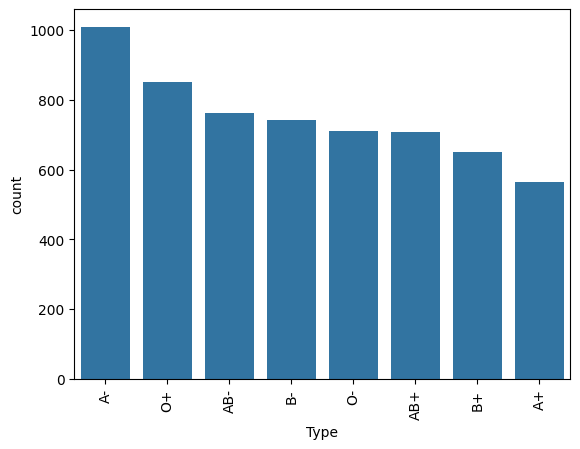

In [22]:
counts = data.Label.value_counts()
sns.barplot(x=counts.index, y=counts)
plt.xlabel('Type')
plt.xticks(rotation=90)

In [27]:
train,test = train_test_split(data,test_size= 0.25, random_state =42)

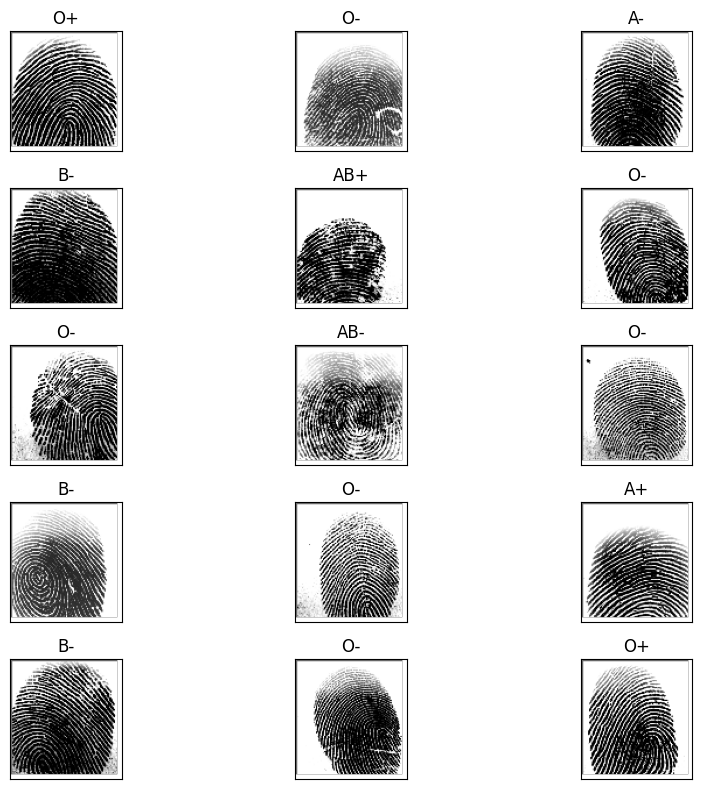

In [24]:
fig, axes = plt.subplots(nrows=5, ncols = 3, figsize=(10,8), subplot_kw ={'xticks':[],'yticks':[]})
for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])
plt.tight_layout()
plt.show()

In [28]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)

In [29]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe = train,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (256,256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = True,
    seed =42
)
valid_gen = train_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (256,256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
    seed =42
)
test_gen = test_datagen.flow_from_dataframe(
    dataframe = test,
    x_col = 'Filepath',
    y_col = 'Label',
    target_size = (256,256),
    class_mode = 'categorical',
    batch_size = 32,
    shuffle = False,
)




Found 4500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.
Found 1500 validated image filenames belonging to 8 classes.


In [33]:
pretrained_model = MobileNet(
    input_shape=(256,256,3),
    include_top = False,
    weights = 'imagenet',
    pooling='avg'
)
pretrained_model.trainable = False

C:\Users\beesa\AppData\Local\Temp\ipykernel_688\4019421263.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  pretrained_model = MobileNet(


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [38]:
inputs = pretrained_model.input

x = Dense(128, activation= 'relu')(pretrained_model.output)
x = Dense(128, activation = 'relu')(x)

outputs = Dense(8, activation ='softmax')(x)

model = Model(inputs=inputs, outputs =outputs)

In [39]:
model.compile(
    optimizer = 'adam',
    loss= 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [41]:
my_callbacks = [EarlyStopping(monitor = 'val_accuracy',
                              min_delta= 0,
                              patience=2,
                              mode= 'auto'
                             )]

In [43]:
history = model.fit(
    train_gen,
    validation_data = valid_gen,
    epochs= 40
)

Epoch 1/40


C:\ml_proj\my_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


141/141 ━━━━━━━━━━━━━━━━━━━━ 141s 966ms/step - accuracy: 0.4084 - loss: 1.5362 - val_accuracy: 0.6827 - val_loss: 0.8125
Epoch 2/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 792ms/step - accuracy: 0.7170 - loss: 0.7306 - val_accuracy: 0.7480 - val_loss: 0.6388
Epoch 3/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 111s 786ms/step - accuracy: 0.7818 - loss: 0.5580 - val_accuracy: 0.7820 - val_loss: 0.5638
Epoch 4/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 113s 798ms/step - accuracy: 0.8180 - loss: 0.4638 - val_accuracy: 0.7620 - val_loss: 0.6101
Epoch 5/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 112s 796ms/step - accuracy: 0.8220 - loss: 0.4612 - val_accuracy: 0.7900 - val_loss: 0.5608
Epoch 6/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 113s 801ms/step - accuracy: 0.8563 - loss: 0.3717 - val_accuracy: 0.7640 - val_loss: 0.6085
Epoch 7/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 114s 805ms/step - accuracy: 0.8589 - loss: 0.3609 - val_accuracy: 0.7947 - val_loss: 0.5337
Epoch 8/40
141/141 ━━━━━━━━━━━━━━━━━━━━ 115s 817ms/step - accuracy: 0.8767 - loss: 0.32

In [44]:
model.save("model_blood_group_detection.h5")

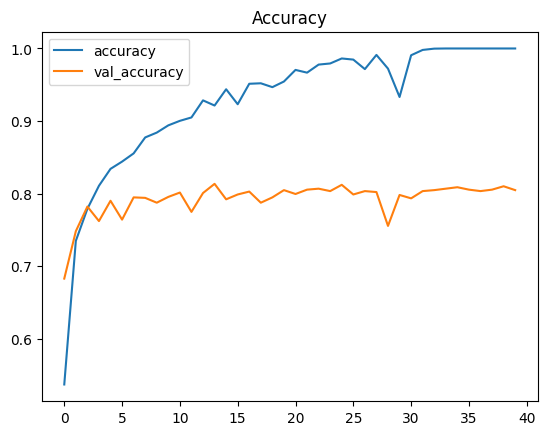

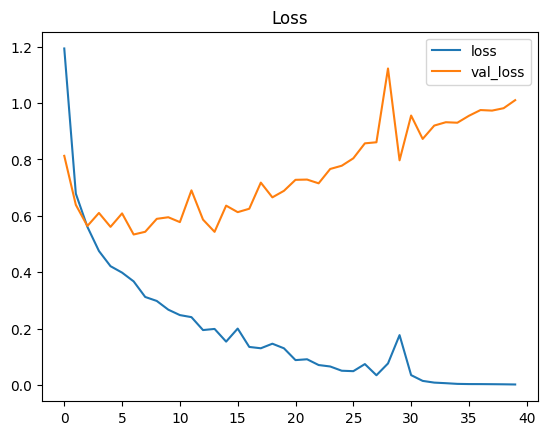

In [45]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [46]:
results = model.evaluate(test_gen, verbose=0)

print("Test loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1]*100))

C:\ml_proj\my_venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Test loss: 1.00981
Test Accuracy: 80.47%


In [48]:
#Predict  the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred, axis=1)

#Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

47/47 ━━━━━━━━━━━━━━━━━━━━ 34s 712ms/step


In [51]:
y_test = list(test.Label)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

          A+       0.87      0.86      0.87       153
          A-       0.74      0.71      0.72       252
         AB+       0.81      0.77      0.79       172
         AB-       0.80      0.84      0.82       186
          B+       0.77      0.78      0.78       173
          B-       0.84      0.95      0.89       173
          O+       0.84      0.78      0.81       223
          O-       0.78      0.81      0.80       168

    accuracy                           0.80      1500
   macro avg       0.81      0.81      0.81      1500
weighted avg       0.80      0.80      0.80      1500



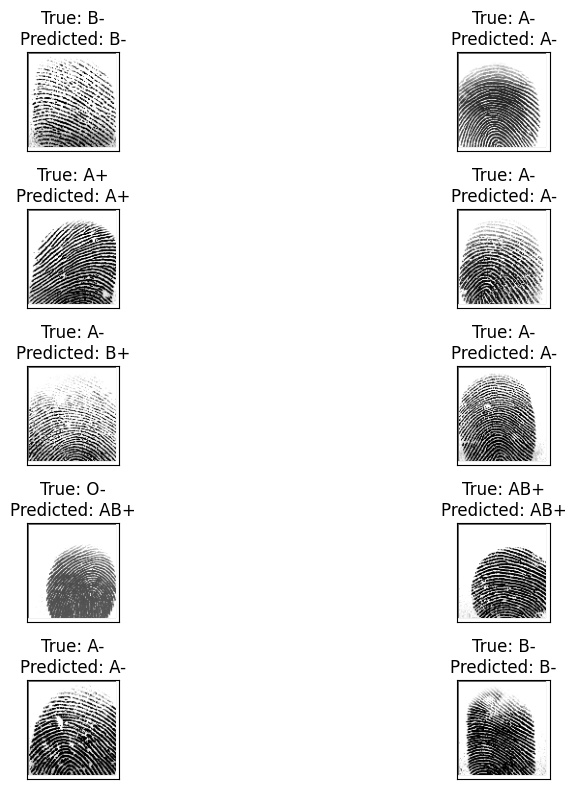

In [56]:
fig, axes = plt.subplots(nrows=5, ncols =2 ,figsize=(12,8),
                       subplot_kw={'xticks':[],'yticks':[]})

for i,ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [58]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = "C:\\Users\\beesa\\OneDrive\\Desktop\\Major Project\\Blood Group Detection\\dataset_blood_group\\AB-\\cluster_5_243.BMP"
img = image.load_img(img_path, target_size=(256,256))
x= image.img_to_array(img)

x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print((result*100).astype('int'))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[ 0  0  0 99  0  0  0  0]]
